# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [54]:
# Load .env enviroment variables
load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json"


In [4]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url)

# Fetch current ETH price
eth_current_price = requests.get(eth_url)

# Convert output to JSON
btc_data_json = btc_current_price.json()
eth_data_json = eth_current_price.json()

btc_price_list = btc_data_json['data']['1']['quotes']['USD']['price']
eth_price_list = eth_data_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price_list
my_eth_value = my_eth * eth_price_list

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")



The current value of your 1.2 BTC is $69322.80
The current value of your 5.3 ETH is $11619.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [5]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [6]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [7]:
# Format current date as ISO format
current_date= pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high    low   close   volume    open   
time                                                                         
2021-04-16 00:00:00-04:00  114.56  114.665  114.5  114.54  3488514  417.25   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-16 00:00:00-04:00  417.91  415.73  417.31  66624780

In [8]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.54
Current SPY closing price: $417.31


In [9]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.50
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [10]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]},index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,80942.043
shares,43773.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

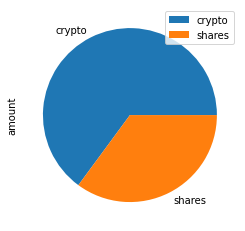

In [11]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on having adequate funds in your emergency fund.")
else:
    print(f'You are short of ${emergency_fund - total_savings} from maintaining adequate funds in your emergency fund.')

Congratulations on having enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [13]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-16', tz='America/New_York').isoformat()

In [14]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-11-20 00:00:00-05:00  118.19  118.340  118.1300  118.29  5496191  357.50   
2020-11-23 00:00:00-05:00  118.28  118.300  118.1734  118.27  3844326  357.28   
2020-11-24 00:00:00-05:00  118.24  118.280  118.0700  118.09  4113975  360.21   
2020-11-25 00:00:00-05:00  118.15  118.210  118.0200  118.08  3739909  363.13   
2020-11-27 00:00:00-05:00  118.25  118.285  118.2200  118.27  4646812  363.84   

                                                               
                              high      low   close    volume  
time                                                           
2020-11-20 00:00:00-05:00  357.720  355.250  355.34  47947194  
2020-11-23 00:00:00-05:00  358.790  354.865  357.47  49938331  
2020-11-24 00:00:00-05:00  363.805  359.290  363.19  49862168  
2020-11-25 00:00:00-05:00  363.160  361.480  362.65  35309156  
2020-11-27 00:00:00-05:00  364.180  362.580  363.65  46840189

In [15]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [16]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-11-20 00:00:00-05:00  118.19  118.340  118.1300  118.29  5496191   
2020-11-23 00:00:00-05:00  118.28  118.300  118.1734  118.27  3844326   
2020-11-24 00:00:00-05:00  118.24  118.280  118.0700  118.09  4113975   
2020-11-25 00:00:00-05:00  118.15  118.210  118.0200  118.08  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.2200  118.27  4646812   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2020-11-20 00:00:00-05:00          NaN  357.50  357.720  355.250  355.34   
2020-11-23 00:00:00-05:00    -0.000169  357.28  358.790  354.865  357.47   
2020-11-24 00:00:00-05:00    -0.001522  360.21  363.805  359.290  363.19   
2020-11-25 00:00:00-05:00    -0.000085  363.13  363.160  361.480  362.65   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.180  362.580  363.65   

                                                  
                             volume daily_return  
time                                              
2020-11-20 00:00:00-05:00  47947194          NaN  
2020-11-23 00:00:00-05:00  49938331     0.005994  
2020-11-24 00:00:00-05:00  49862168     0.016001  
2020-11-25 00:00:00-05:00  35309156    -0.001487  
2020-11-27 00:00:00-05:00  46840189     0.002757

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001645,1.000212,1.000632,1.004930,0.996508,1.007818,1.004890,0.993855,1.001833,1.008101,...,0.986767,0.998726,1.003355,1.000315,1.003136,0.994487,0.996841,1.003673,0.998008,1.014867
2,1.003427,1.006807,1.007854,1.009037,0.995129,1.008242,1.005707,1.008049,0.999865,1.009579,...,0.985039,1.002253,0.997119,1.000292,1.021583,0.987814,0.997421,1.001269,0.998753,1.027237
3,1.011444,1.009145,1.010158,1.013859,0.998362,1.000312,0.997954,1.012429,1.002678,1.008895,...,0.989381,1.001917,1.000302,0.996074,1.019002,0.988931,0.998082,1.002838,1.001403,1.033092
4,1.006670,1.016240,1.004289,1.016365,0.996622,1.000182,0.999705,1.006649,1.010591,1.009407,...,0.993693,0.994469,0.990903,1.001781,1.017021,0.988134,0.989176,1.010493,1.003487,1.034956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,609.939192,786.784625,1253.937152,921.886008,494.284726,726.029494,215.577069,660.446006,1190.354731,634.443459,...,831.722549,689.009733,872.899119,399.578308,444.452781,329.264938,588.077865,387.265039,1088.614030,882.629516
7557,617.730861,781.549579,1247.487177,923.879233,493.693549,724.508449,213.297474,661.220837,1193.173272,630.792236,...,834.986736,684.710007,870.098292,401.351318,444.196987,332.039319,589.267316,385.615248,1085.046087,878.753651
7558,618.983619,787.429098,1248.872341,923.539253,494.508573,721.571837,214.463686,660.940783,1192.580693,626.636671,...,835.261255,681.109640,871.490752,401.417637,445.381389,332.312165,585.662766,386.873289,1086.464960,879.853079
7559,619.665189,782.962209,1258.763630,926.981374,499.105478,720.225101,214.928826,664.497833,1192.303845,623.672011,...,845.640982,684.231714,875.621036,405.868634,448.006652,332.182314,590.264497,386.048083,1077.866212,875.975378


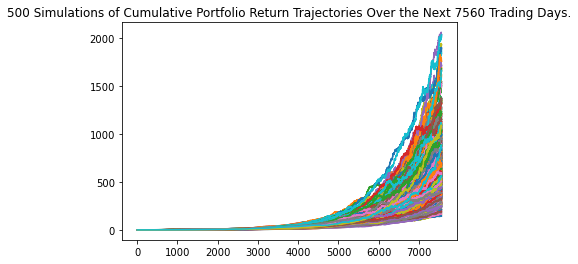

In [18]:
# Plot simulation outcomes
sim_plot = MC_30_years.plot_simulation()

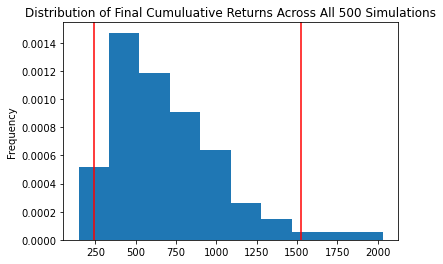

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

### Retirement Analysis

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_30_years.summarize_cumulative_return()

# Print summary statistics
summary

count            500.000000
mean             686.532582
std              328.911201
min              144.874490
25%              446.043028
50%              619.351543
75%              873.755151
max             2032.794509
95% CI Lower     243.394438
95% CI Upper    1523.489265
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $4867888.76 and $30469785.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $7301833.14 and $45704677.94


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [76]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [77]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [78]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [79]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [81]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")